In [1]:
import numpy as np
import h5py, time, os
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

import spikeinterface.full as si
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import scipy.signal
from spikeinterface.preprocessing import bandpass_filter, notch_filter, common_reference, preprocesser_dict

C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\spikeextractors\extractors\mearecextractors\mearecextractors.py:13: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(mr.__version__) >= '1.5.0':


In [2]:
local_path = 'C:/Users/jonat/Documents/RoyBensLab/RawData Analyser/ASmouse/16874/Network/000225/data.raw.h5'
recording = se.read_maxwell(local_path)

In [3]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)

Channel ids: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '42' '43' '44' '45'
 '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59'
 '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72' '73'
 '74' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87' '88'
 '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100' '101' '102'
 '103' '104' '105' '106' '107' '108' '109' '110' '111' '112' '113' '114'
 '115' '116' '117' '118' '119' '120' '121' '122' '123' '124' '125' '126'
 '128' '129' '130' '131' '132' '133' '134' '135' '136' '138' '140' '142'
 '143' '144' '145' '146' '148' '150' '152' '154' '155' '156' '158' '160'
 '162' '163' '164' '166' '168' '169' '170' '172' '173' '174' '176' '178'
 '180' '182' '184' '186' '187' '188' '190' '191' '192' '194' '195' '196'
 '197' '198' '199' '200' '201' '202' '203' '204' 

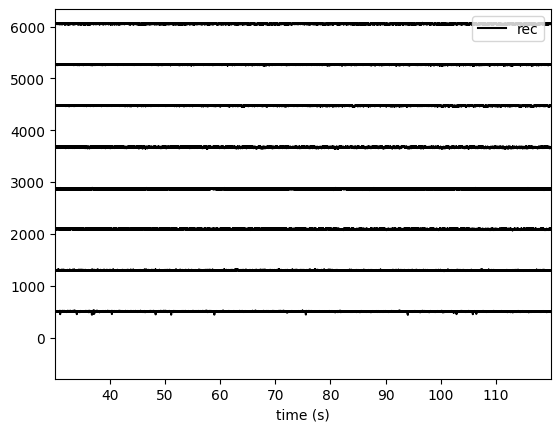

In [4]:
ts = sw.plot_timeseries(recording, time_range=(30, 120), channel_ids= recording.channel_ids[420:428])

(0.0, 300.0, 420.0, 580.0)

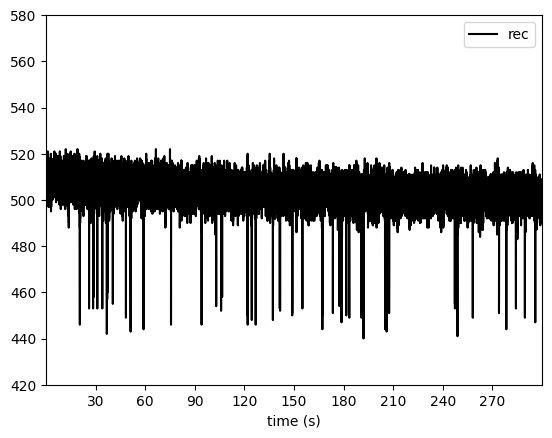

In [5]:
w_ts = sw.plot_timeseries(recording, time_range=(0, 300), channel_ids= recording.channel_ids[420:421])
plt.axis([0, 300, 420, 580])

BandpassFilterRecording: 869 channels - 1 segments - 20.0kHz - 300.080s


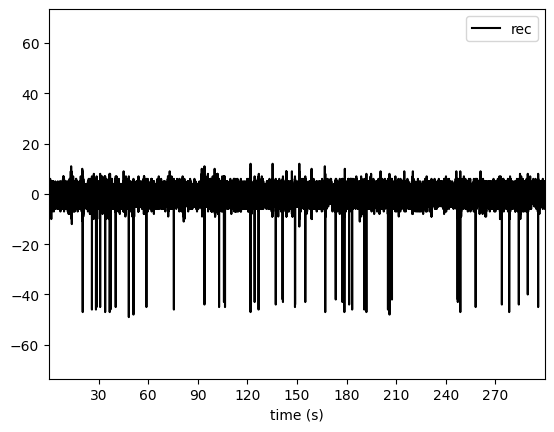

In [6]:
recording_bp200_4000 = bandpass_filter(recording, freq_min=200, freq_max=4000)
print(recording_bp200_4000)
bpf_ts = sw.plot_timeseries(recording_bp200_4000, time_range=(0, 300), channel_ids= recording.channel_ids[420:421])

In [7]:
print(ss.available_sorters())

['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'klusta', 'mountainsort4', 'pykilosort', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']


In [12]:
recording_bp200_4000.get_num_segments()
recording_bp200_4000.get_num_frames(segment_index=0)

6001600

In [13]:
traces = recording_bp200_4000.get_traces(segment_index=0)

C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\astroid\interpreter\_import\spec.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


MemoryError: Unable to allocate 38.9 GiB for an array with shape (869, 6001666) and data type float64

In [ ]:
print(traces.shape)

In [8]:
#sorting = ss.run_sorter(sorter_name='tridesclous', recording=recording_bp200_4000, output_folder='my_sorter_output')